In [1]:
import observational_fear.load as load
from pathlib import Path
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")


DATA_DIR = Path(r"D:\OFL\one-p experiment\data")
FIG_DIR = Path(r"C:\Users\roryl\repos\observational-fear\figs")
df = load.load_cell_mapper(DATA_DIR)

In [2]:
df.head(3)

,cell_id,mouse,new_id,session_cell_id,session_index,session
0,0,B17274,0,0,0,day1
1,0,B17274,0,0,1,day2
2,0,B17274,0,0,2,day3


In [6]:
load.load_behaviour(DATA_DIR, "day2")

,frame,time,video_name,fps,x,y,distance,was_freezing,role,mouse_name,mouse
0,1,0.03,OFL_day2 090920_B17274_H.264_TC.mp4,30.0,61,46,NaN,0.0,obs,B17274,B17274.csv
1,2,0.07,OFL_day2 090920_B17274_H.264_TC.mp4,30.0,61,46,0.0,0.0,obs,B17274,B17274.csv
2,3,0.10,OFL_day2 090920_B17274_H.264_TC.mp4,30.0,60,46,1.0,0.0,obs,B17274,B17274.csv
3,4,0.13,OFL_day2 090920_B17274_H.264_TC.mp4,30.0,61,46,1.0,0.0,obs,B17274,B17274.csv
4,5,0.17,OFL_day2 090920_B17274_H.264_TC.mp4,30.0,61,46,0.0,0.0,obs,B17274,B17274.csv
...,...,...,...,...,...,...,...,...,...,...,...
129585,64791,2159.70,PL-OFL-2_day2_060821.mp4,30.0,67,26,1.0,0.0,dem,PL-OFL-2,PL-OFL-2.csv
129586,64792,2159.73,PL-OFL-2_day2_060821.mp4,30.0,66,26,1.0,0.0,dem,PL-OFL-2,PL-OFL-2.csv
129587,64793,2159.77,PL-OFL-2_day2_060821.mp4,30.0,66,26,0.0,0.0,dem,PL-OFL-2,PL-OFL-2.csv
129588,64794,2159.80,PL-OFL-2_day2_060821.mp4,30.0,66,27,1.0,0.0,dem,PL-OFL-2,PL-OFL-2.csv


## How many cells?

#### Per mouse

#### On an average session

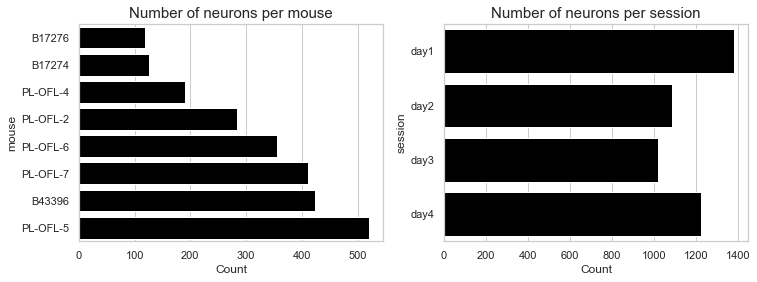

In [69]:
_, ax = plt.subplots(ncols=2, figsize=(12, 4))

ax[0].set_title("Number of neurons per mouse", fontsize=15)
(
  df
  [["new_id", "mouse"]].drop_duplicates()
  .groupby("mouse", as_index=False).apply(len)
  .rename(columns={None:"Count"})
  .sort_values("Count")
  .pipe((sns.barplot, "data"), y="mouse", x="Count", color="black", ax=ax[0])
)

ax[1].set_title("Number of neurons per session",  fontsize=15)
(
  df
  .groupby("session", as_index=False).apply(len)
  .rename(columns={None:"Count"})
  # .sort_values("Count")
  .pipe((sns.barplot, "data"), y="session", x="Count", color="black")
)
plt.savefig(FIG_DIR /"dataset-neurons.png", dpi=200)

## Recording neurons over days

#### How many recorded on 1, 2, 3, 4 days

#### Odds of recording a cell given that it was recorded 

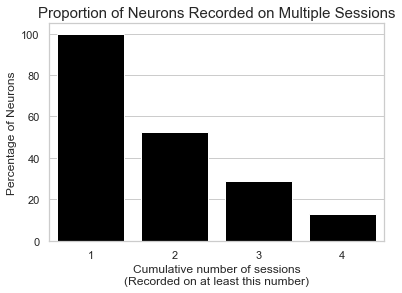

In [70]:
_, ax = plt.subplots()

ax.set_title("Proportion of Neurons Recorded on Multiple Sessions", fontsize=15)
(
    df
    .groupby("new_id", as_index=False).apply(len)
    .rename(columns={None: "num_sessions"})
    .groupby("num_sessions", as_index=False).apply(lambda x: len(x) / df["new_id"].nunique() * 100)
    .rename(columns={None: "Percentage"})
    .assign(Cumulative=lambda x: x["Percentage"].iloc[::-1].cumsum())
    .pipe((sns.barplot, "data"), x="num_sessions", y="Cumulative", color="black", ax=ax)
)
ax.set_ylabel("Percentage of Neurons")
ax.set_xlabel("Cumulative number of sessions\n(Recorded on at least this number)")
plt.savefig(FIG_DIR /"dataset-longreg.png", dpi=200)

## Examples

#### Example traces

#### Example picture